# Description

To write pure code for creating the model of Dogs vs Cats

https://www.kaggle.com/c/dogs-vs-cats

# Step 1a: init

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogscats/"

# Step 1b: functions for analyzing results

In [2]:
from sklearn.metrics import confusion_matrix


def show_cm():
    log_preds = learn.predict() # this gives prediction for validation set. Predictions are in log scale
    preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
    probs = np.exp(log_preds[:,1])        # pr(dog)
    y = data.val_y # This is the label for a val data

    cm = confusion_matrix(y, preds)
    plot_confusion_matrix(cm, data.classes)
    
    return cm

    
def print_rates(cm):
    print('Predicted dogs = {}'.format(cm[1, 1] + cm[0, 1]))
    print('Predicted cats = {}'.format(cm[0, 0] + cm[1, 0]))
    predicted_dogs = cm[1, 1] + cm[0, 1]
    predicted_cats = cm[0, 0] + cm[1, 0]

    print('Actual dogs = {}'.format(cm[0, 0] + cm[0, 1]))
    print('Actual cats = {}'.format(cm[1, 0] + cm[1, 1]))
    actual_dogs = cm[0, 0] + cm[0, 1]
    actual_cats = cm[1, 0] + cm[1, 1]
    total = actual_dogs + actual_cats

    print('True dogs = {}'.format(cm[1, 1]))
    print('True cats = {}'.format(cm[0, 0]))
    true_dogs = cm[1, 1]
    true_cats = cm[0, 0]

    print('False dogs = {}'.format(cm[0, 1]))
    print('False cats = {}'.format(cm[1, 0]))
    false_dogs = cm[0, 1]
    false_cats = cm[1, 0]

    print('\n*** Rates ***\n')
    accuracy = (true_dogs + true_cats) / total
    print('Accuracy = %s' % accuracy)

    misclassification_rate = (false_dogs + false_cats) / total
    print('Misclassification rate = %s' % misclassification_rate)

    true_dogs_rate = true_dogs / actual_dogs
    print('True dogs rate = %s' % true_dogs_rate)

    true_cats_rate = true_cats / actual_cats
    print('True cats rate = %s' % true_cats_rate)

# Step 1c: create the learn object

In [3]:
sz = 224
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=False)

# Step 1d: load

In [4]:
learn.load('lesson1_a_v2_unfreeze_all_layers')

# Step 1e: checking

[[990  10]
 [  6 994]]


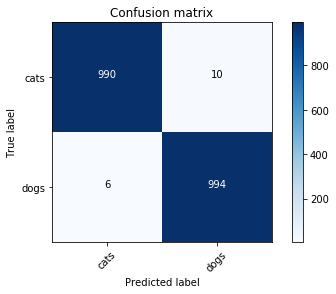

In [5]:
cm = show_cm()

In [6]:
print_rates(cm)

Predicted dogs = 1004
Predicted cats = 996
Actual dogs = 1000
Actual cats = 1000
True dogs = 994
True cats = 990
False dogs = 10
False cats = 6

*** Rates ***

Accuracy = 0.992
Misclassification rate = 0.008
True dogs rate = 0.994
True cats rate = 0.99


# Step 2a: learn with new size

In [7]:
# *** new size ***
sz = 299

tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

learn.set_data(data)
learn.unfreeze()
lr=np.array([1e-4, 1e-3, 1e-2])

In [8]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.023939   0.017195   0.993     
    1      0.023407   0.014297   0.9935                       
    2      0.015573   0.013268   0.9945                       
    3      0.022072   0.013967   0.996                        
    4      0.021406   0.015343   0.9945                       
    5      0.01835    0.017841   0.994                        
    6      0.013768   0.014814   0.996                         



[array([0.01481]), 0.996]

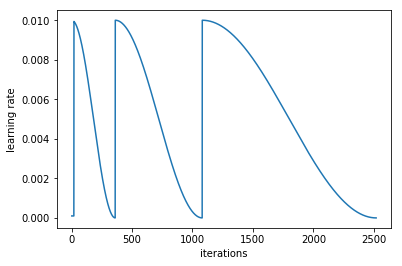

In [9]:
learn.sched.plot_lr()

# Step 2b: save

In [10]:
learn.save('lesson1_a_v4_learn_with_new_size')

In [11]:
learn.load('lesson1_a_v4_learn_with_new_size')

# Step 2c: results

[[1000    0]
 [   8  992]]


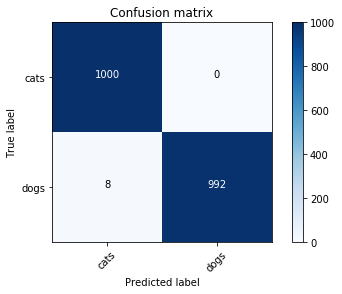

In [12]:
cm = show_cm()

In [13]:
print_rates(cm)

Predicted dogs = 992
Predicted cats = 1008
Actual dogs = 1000
Actual cats = 1000
True dogs = 992
True cats = 1000
False dogs = 0
False cats = 8

*** Rates ***

Accuracy = 0.996
Misclassification rate = 0.004
True dogs rate = 0.992
True cats rate = 1.0
